### Boston House Price Prediction Project  
In this project you will work on developing an end to end machine learning project using linear regression, as this will be your first project in your machine learning journey. 
We will be doing extensive data visualization, we will perform data feature engineering, we will also see how we can select features based on the correlation of the features.

In [1]:
import numpy as np 
import pandas as pd

import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [4]:
from sklearn.datasets import fetch_california_housing
load_boston = fetch_california_housing() 
X = load_boston.data 
y = load_boston.target 

data = pd.DataFrame(X, columns=load_boston.feature_names) 
data["SalePrice"] = y # saleprice 
data.head() 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
data.to_csv('out.zip', index=False,
          compression=compression_opts)  

In [5]:
print(load_boston.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
print(data.shape) 

(20640, 9)


In [7]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   SalePrice   20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### EDA 

In [9]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
SalePrice     0
dtype: int64

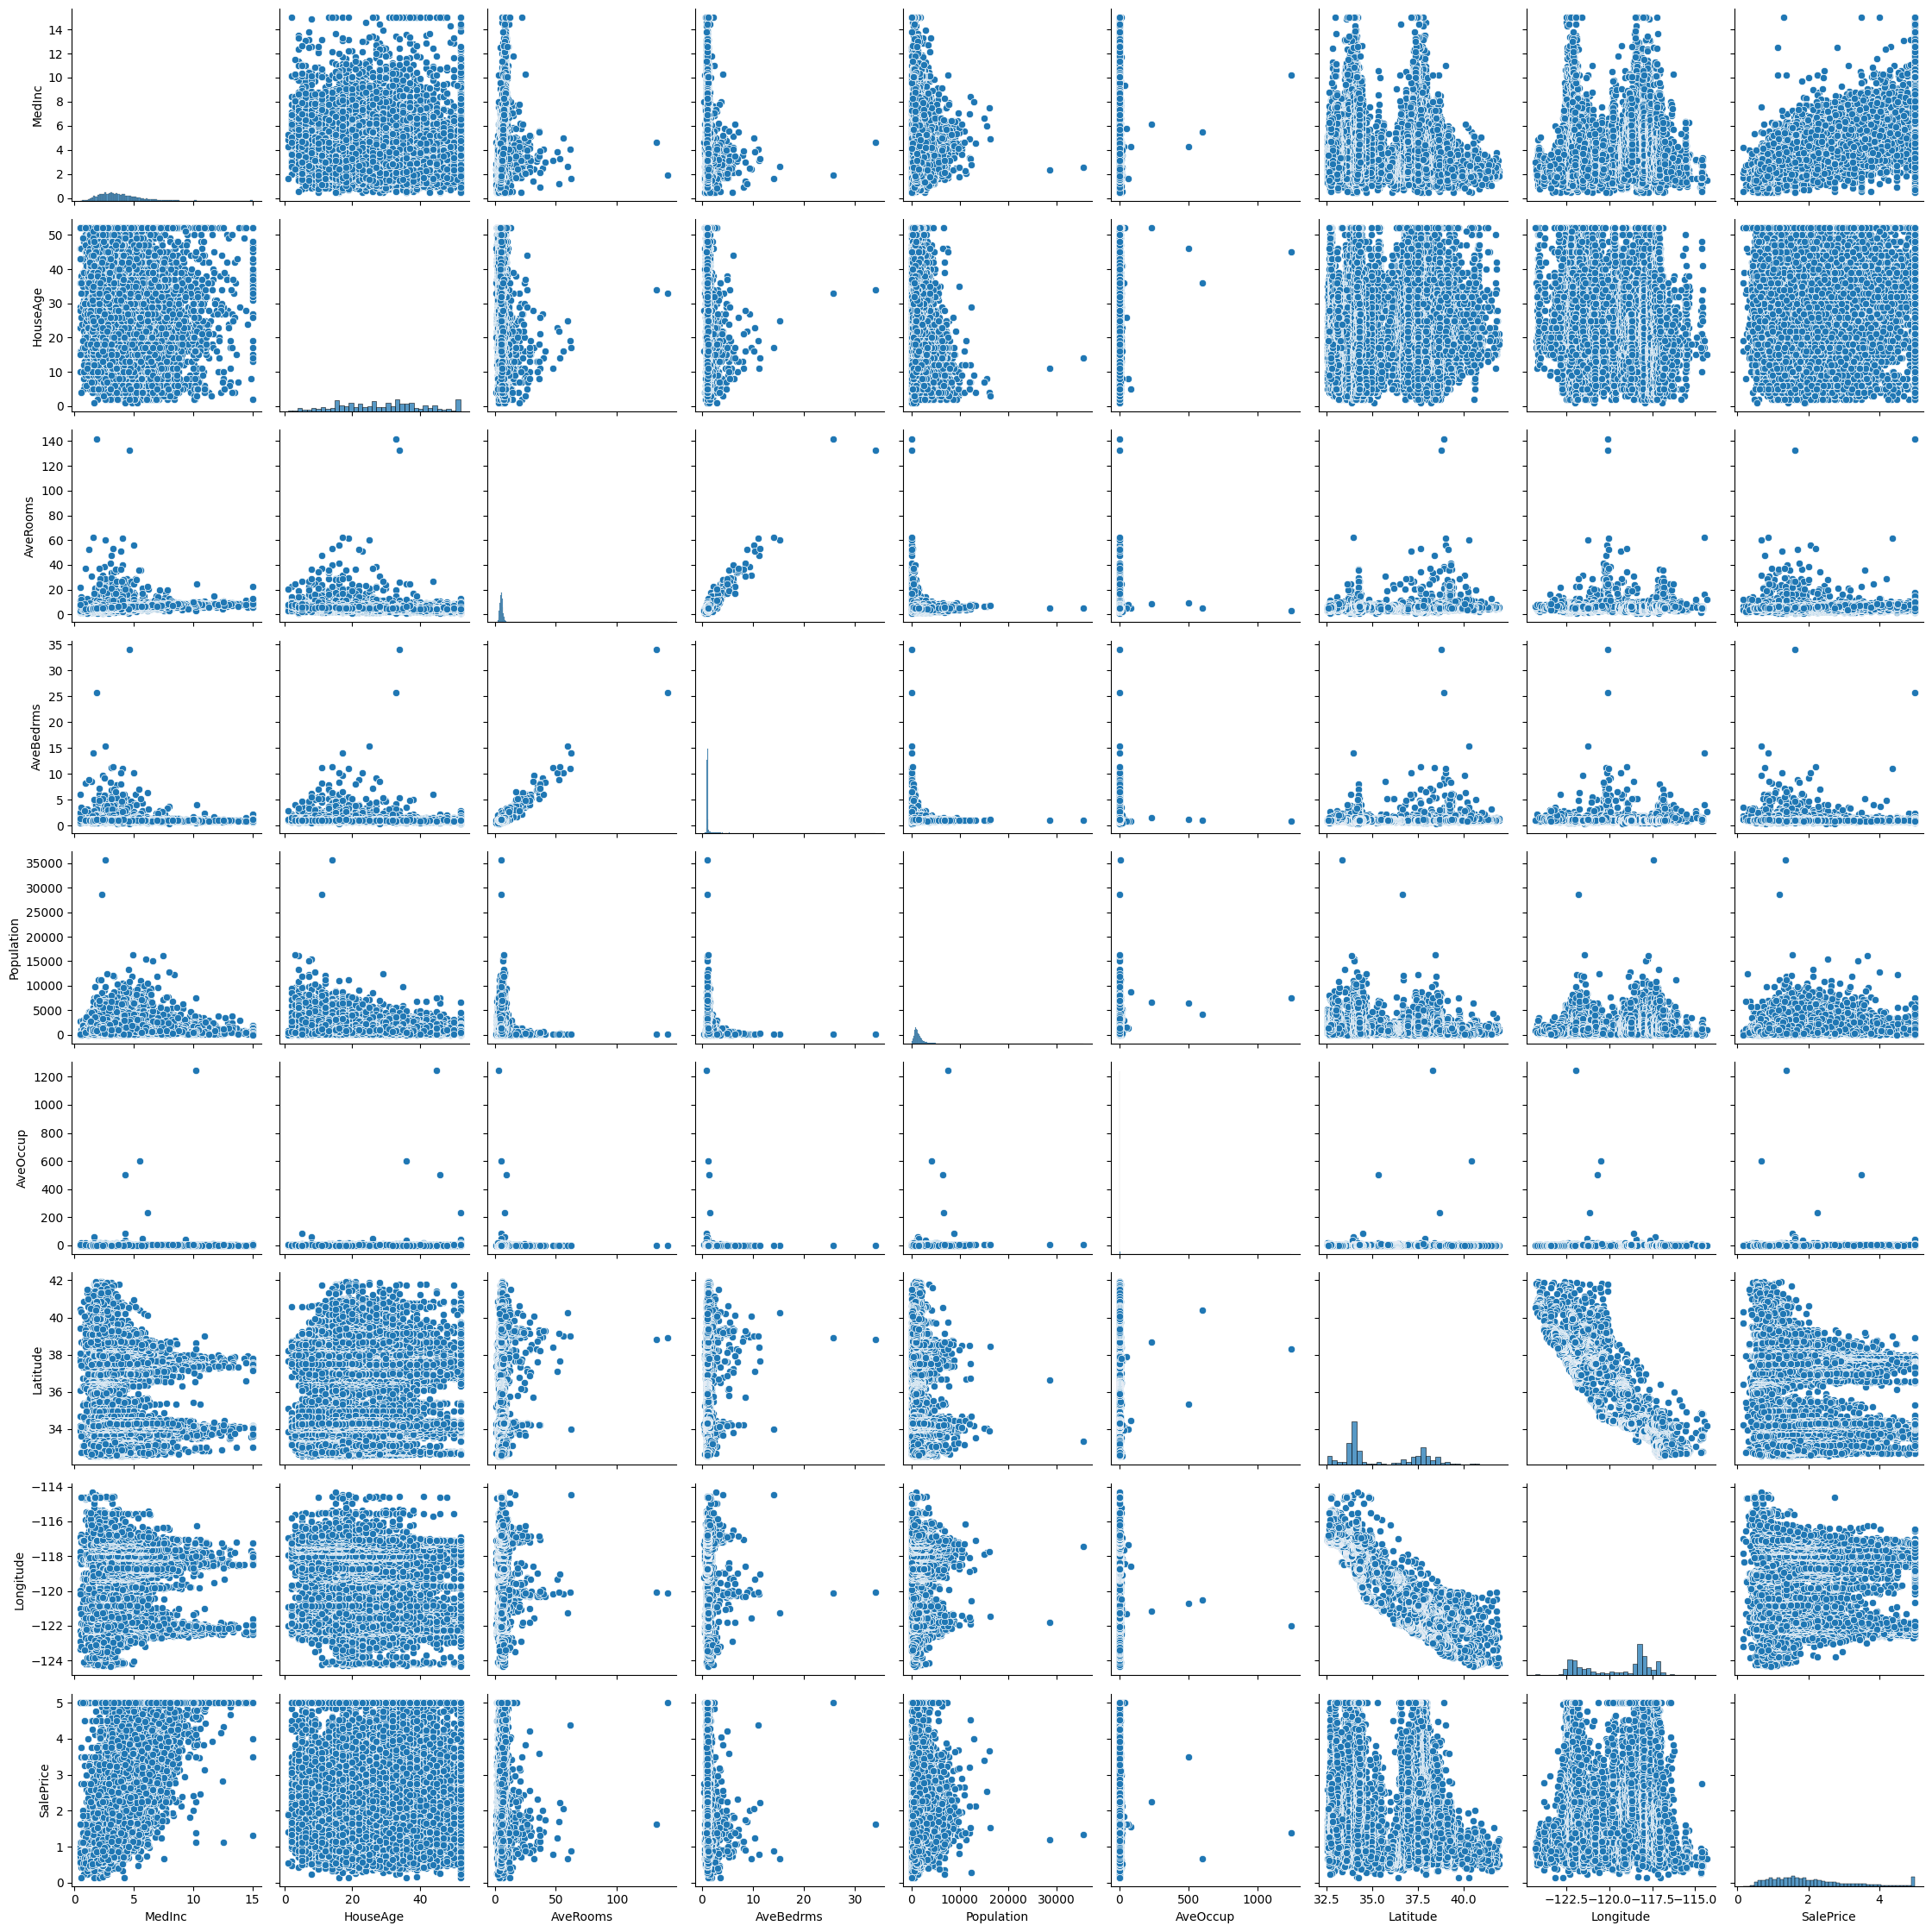

In [10]:
sns.pairplot(data, height=2.5)
plt.tight_layout()

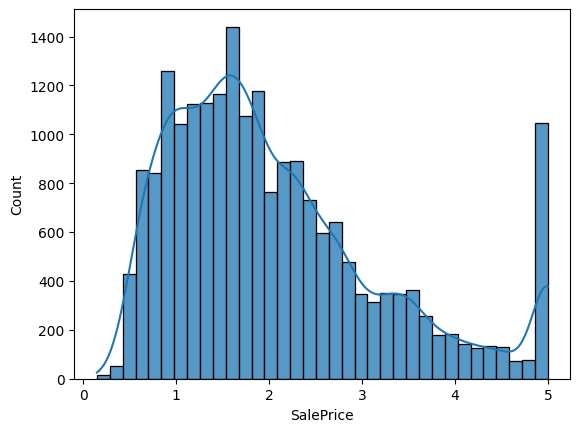

In [45]:
plt.figure()
sns.histplot(data['SalePrice'], kde= True, alpha = 0.75, bins = 35)
plt.show()

In [42]:
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

Skewness: 0.977763
Kurtosis: 0.327870


In [47]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


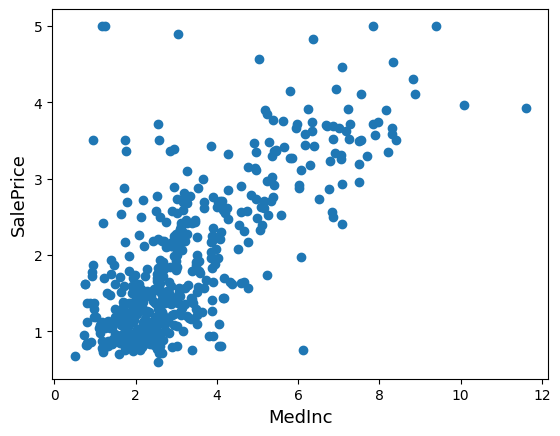

In [50]:
fig, ax = plt.subplots()
ax.scatter(x = data['MedInc'][:500], y = data['SalePrice'][:500])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('MedInc', fontsize=13)
plt.show()

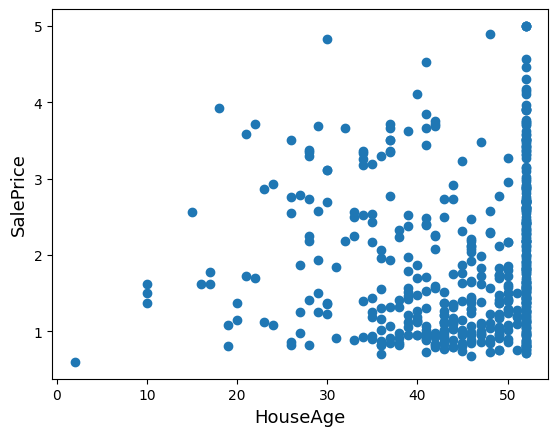

In [53]:
fig, ax = plt.subplots()
ax.scatter(x = data['HouseAge'][:500], y = data['SalePrice'][:500])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('HouseAge', fontsize=13)
plt.show()

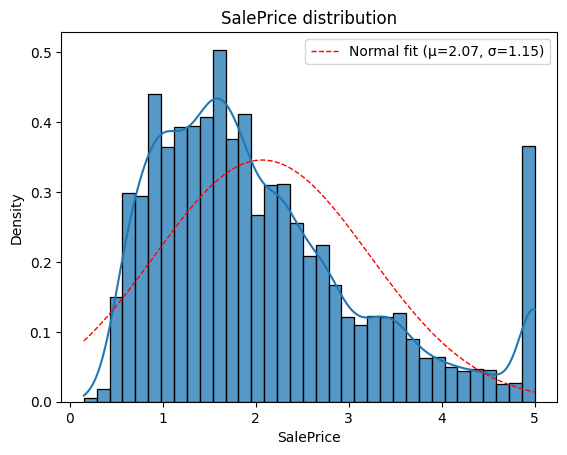

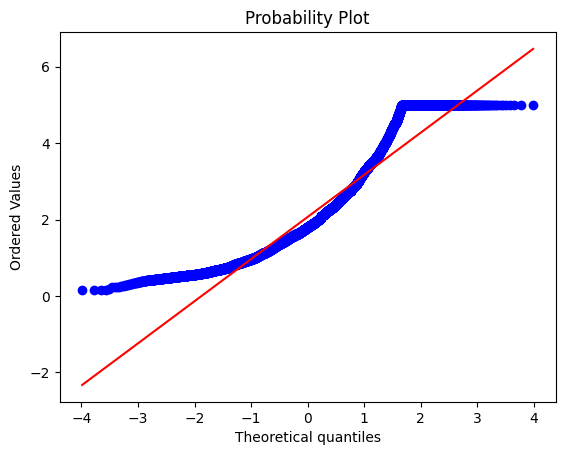

In [ ]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

mu, sigma = norm.fit(data['SalePrice'])

# histogramme en densité
sns.histplot(data['SalePrice'], stat='density', bins=35, edgecolor='black', alpha=0.75, kde = True)

# densité normale ajustée
x = np.linspace(data['SalePrice'].min(), data['SalePrice'].max(), 200)
plt.plot(x, norm.pdf(x, mu, sigma), 'r--', lw=1, label = [f'Normal fit (μ={mu:.2f}, σ={sigma:.2f})'])

plt.legend()
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.title('SalePrice distribution')
plt.show()

# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

# Queue gauche/basse : outliers faibles ou asymétrie
# Queue droite/haute : valeurs extrêmes

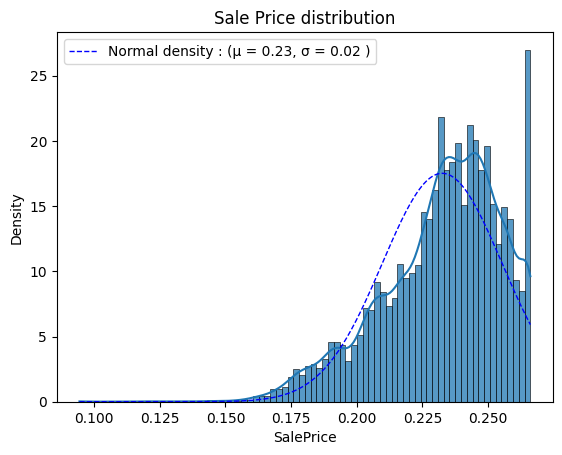

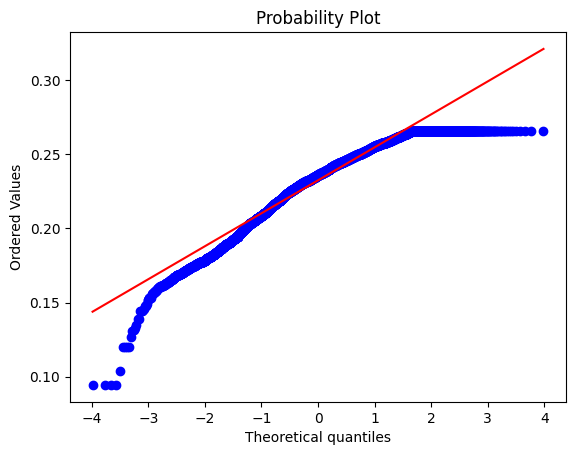

In [96]:
data['SalePrice'] = np.log1p(data['SalePrice'])

mu, sigma = norm.fit(data['SalePrice'])

sns.histplot(data['SalePrice'], stat = 'density', bins = 'auto', kde = True, alpha = 0.75)

x = np.linspace(data['SalePrice'].min(), data['SalePrice'].max(), 200)
plt.plot(x, norm.pdf(x, mu, sigma), 'b--', lw = 1, label = [f'Normal density : (μ = {mu:.2f}, σ = {sigma:.2f} )'])

plt.legend()
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.title('Sale Price distribution')
plt.show

fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot = plt)
plt.show()

### Data Correlation

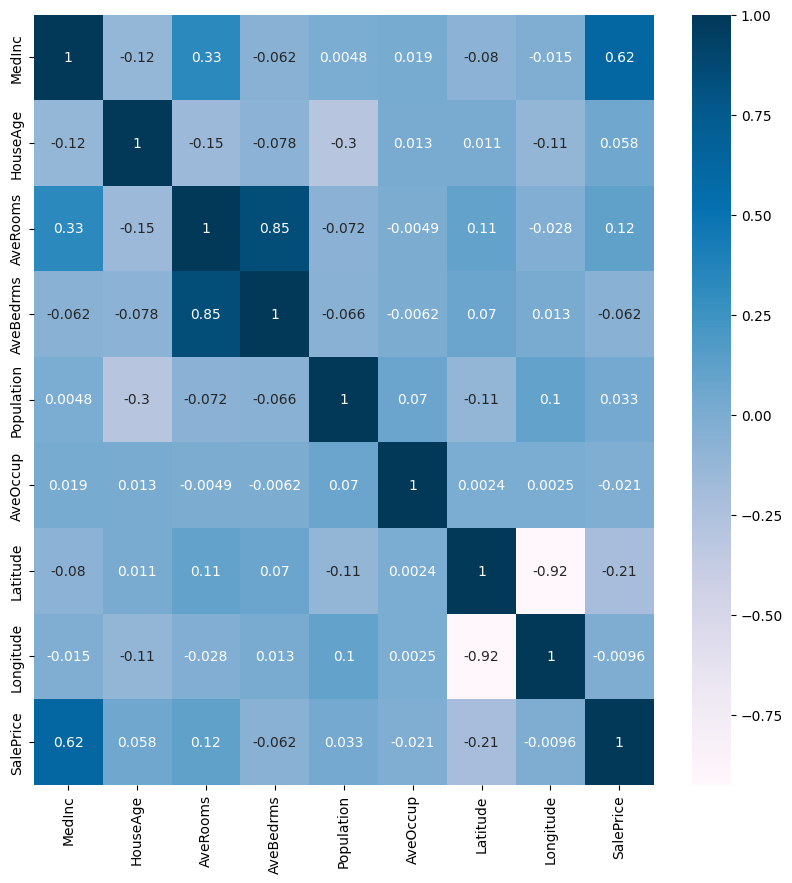

In [97]:
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [ ]:
cor_target = abs(cor["SalePrice"]) # absolute value of the correlation 

relevant_features = cor_target[cor_target>0.2] # highly correlated features 

names = [index for index, value in relevant_features.items()] # getting the names of the features 

names.remove('SalePrice') # removing target feature 

print(names) # printing the features 
print(len(names))


['MedInc', 'Latitude']
2
MedInc        0.620489
HouseAge      0.058346
AveRooms      0.115133
AveBedrms     0.062109
Population    0.033339
AveOccup      0.020983
Latitude      0.209469
Longitude     0.009569
SalePrice     1.000000
Name: SalePrice, dtype: float64


### Model Building 

In [104]:
from sklearn.model_selection import train_test_split 

X = data.drop("SalePrice", axis=1) 
y = data["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [105]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


In [106]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression() 
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [107]:
predictions = lr.predict(X_test)  

print("Actual value of the house:- ", y_test[0]) 
print("Model Predicted Value:- ", predictions[0])

Actual value of the house:-  0.2637816039786211
Model Predicted Value:-  0.20592291778242733


In [108]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions) 
rmse = np.sqrt(mse)
print(rmse)

0.015169970842683247
